In [82]:
import numpy as np
import pandas as pd 
import glob
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from utils import procesar_metricas, summarize_metrics_by_group, summarize_metrics_for_plotting

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

plt.rcParams.update({
    "text.usetex": False,       # Desactiva LaTeX externo (evita error de pdftex.map)
    "font.family": "serif",     # Usa tipografía con serifa
    "mathtext.fontset": "cm",   # Configura las mates para usar Computer Modern
    "mathtext.rm": "serif"      # Configura el texto normal para seguir a las mates
})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [83]:
models = glob.glob(os.path.join('./output/*', '*', 'test_metrics.toml'))
# models = [x for x in models if 'atlas' not in x]

In [113]:
resultados = procesar_metricas(models, folder='output')
resultados = resultados[~resultados['Classifier'].isin(['att_cls', 'avg', 'att_avg'])]

In [114]:
summary_df = summarize_metrics_by_group(resultados)

In [115]:
df_plot = summarize_metrics_for_plotting(resultados)

In [116]:
df_plot['F1_Score_error_low'] = df_plot['F1_Score_mean'] - df_plot['F1_Score_p05']
df_plot['F1_Score_error_high'] = df_plot['F1_Score_p95'] - df_plot['F1_Score_mean']

findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'seri

Guardando ATLAS_archclf...


findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'seri

Guardando Alcock_archclf...


findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'seri

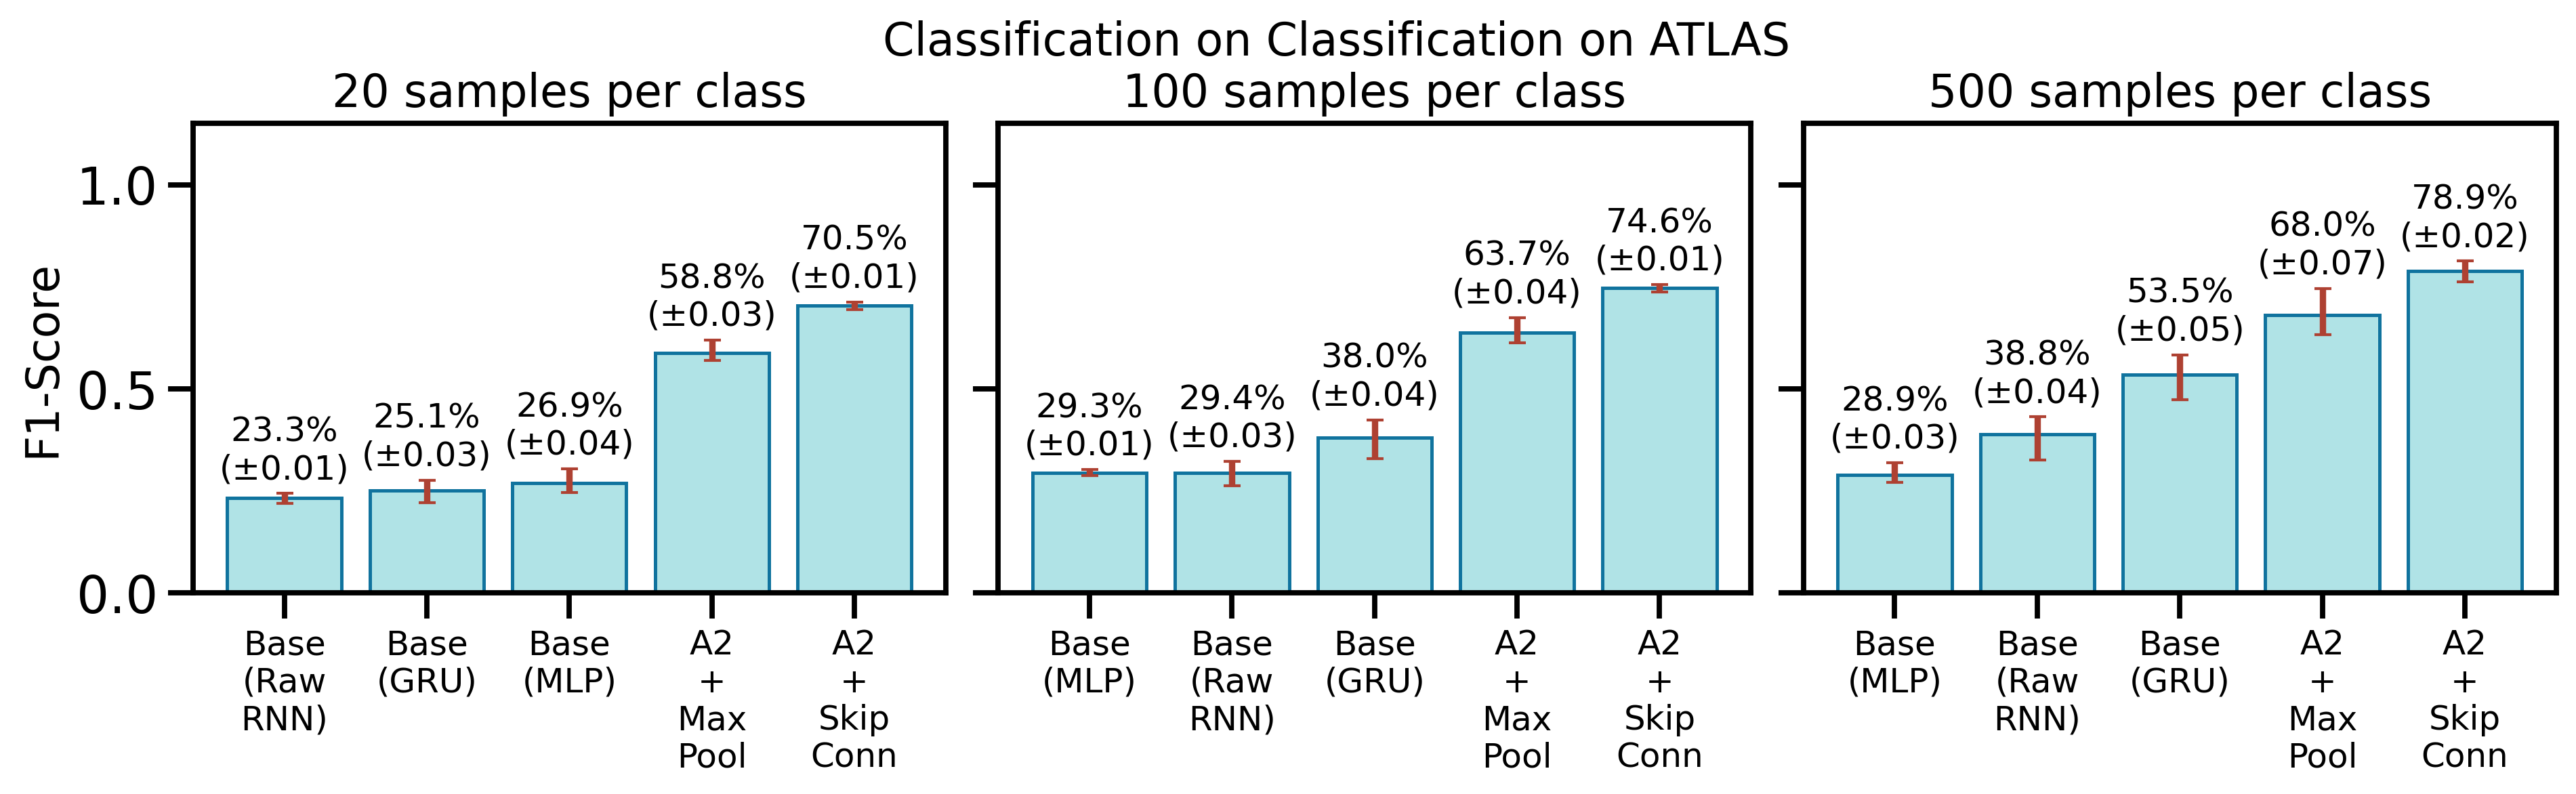

findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'serif' not found because none of the following families were found: cm
findfont: Generic family 'seri

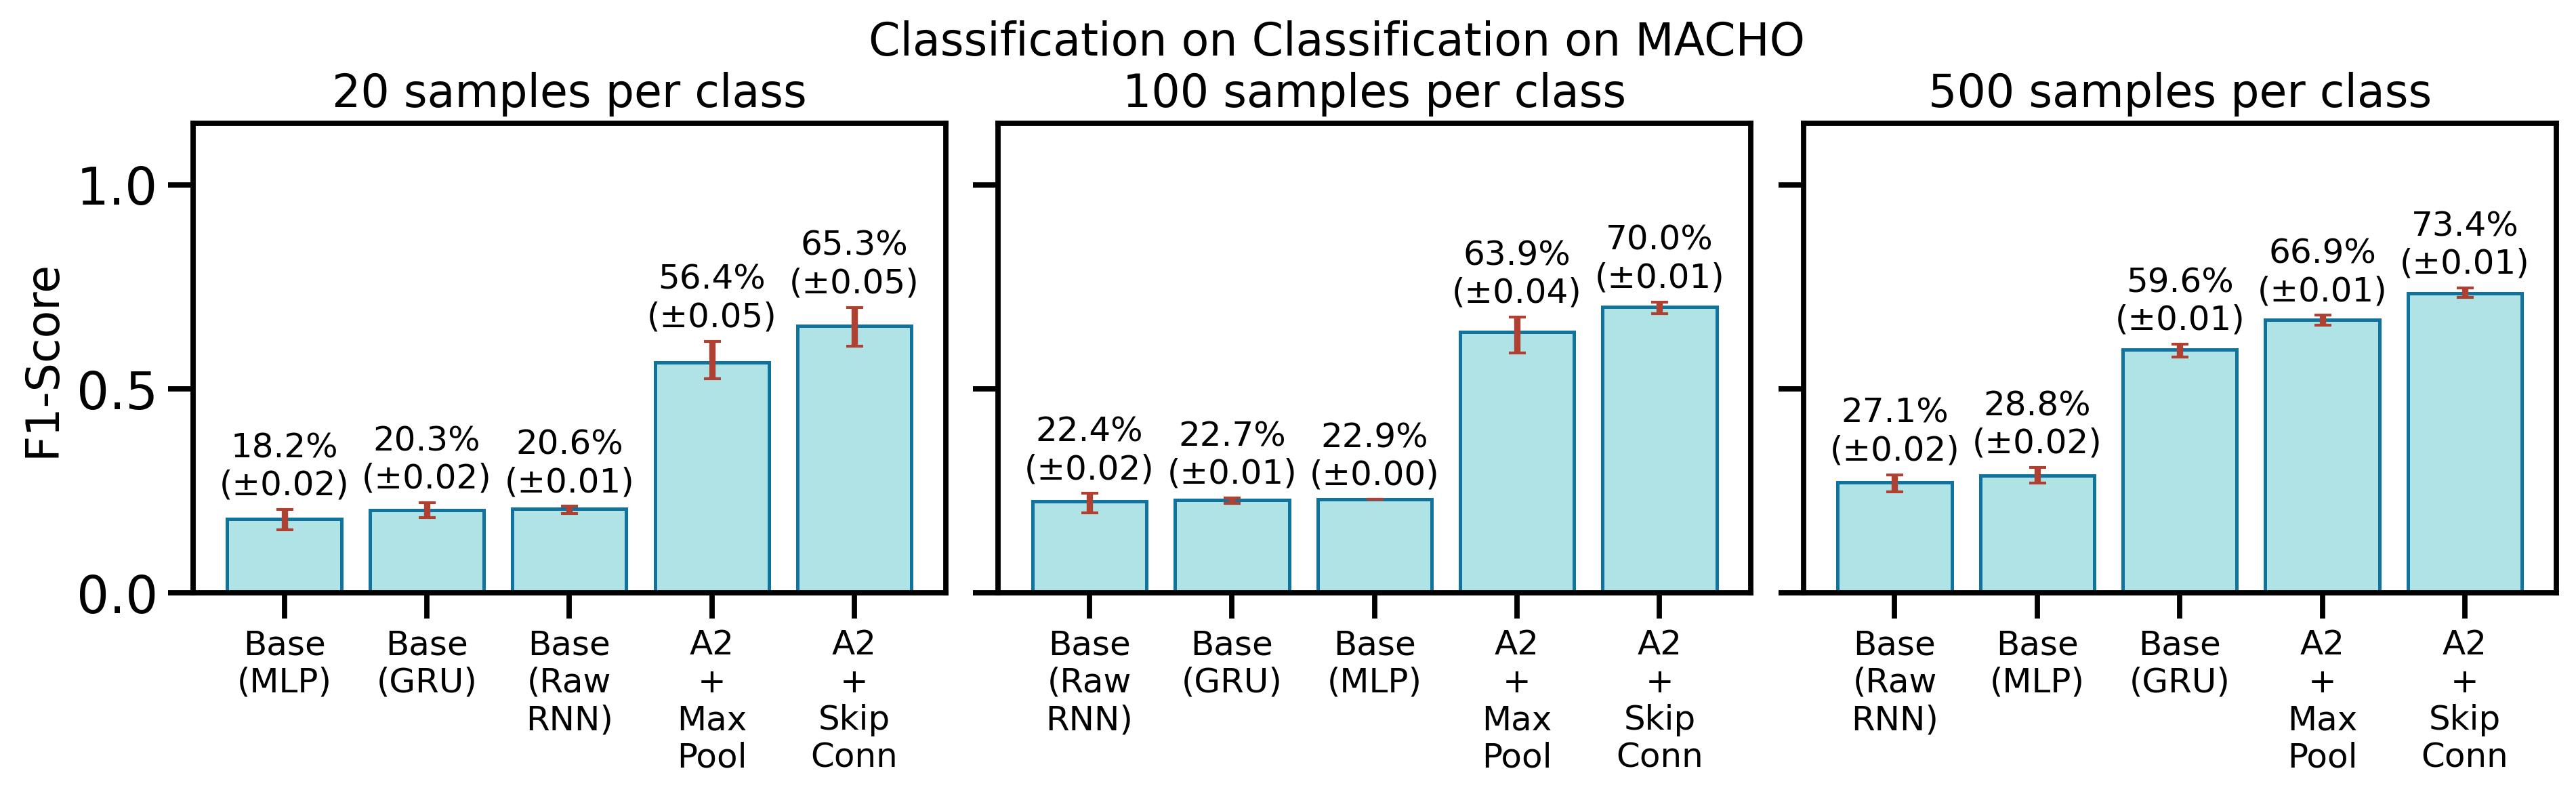

In [119]:
import matplotlib.pyplot as plt
import numpy as np
import os

# --- 1. PRE-PROCESAMIENTO (Mantenido de tu código original) ---
# Asumimos que df_plot ya está cargado
df_plot['Dataset'] = df_plot['Dataset'].replace({'alcock': 'Alcock', 'atlas': 'ATLAS'})

name_mapping = {
    'avg': 'A2 + Avg Pool', 
    'max': 'A2 + Max Pool', 
    'skip': 'A2 + Skip Conn',
    'att_avg': 'Attn (Avg)', 
    'att_cls': 'Attn (CLS)',
    'base_avgpool': 'Base (MLP)', 
    'base_gru': 'Base (GRU)', 
    'raw_gru': 'Base (Raw RNN)'
}
df_plot['Display_Name'] = df_plot['Classifier'].replace(name_mapping)

# Definimos los colores del estilo objetivo
STYLE_COLORS = {
    'bar_face': '#B0E3E6',
    'bar_edge': '#10739E',
    'error_bar': '#AE4132'
}

# Crear directorio de salida si no existe
output_dir = './presentation/pipelines/referee/figures'
os.makedirs(output_dir, exist_ok=True)

# --- 2. PLOTTING (Estilo Transformado) ---

# Iteramos por cada Dataset (ej. Alcock, ATLAS) para generar una figura por dataset
for dataset_name, df_dataset in df_plot.groupby('Dataset'):
    
    # Identificamos los tamaños de muestra disponibles (ej. 100, 1000, etc.)
    unique_samples = sorted(df_dataset['Samples'].unique())
    n_cols = len(unique_samples)
    
    # Configuración de la figura igual al target
    fig, axes = plt.subplots(1, n_cols, figsize=(5 * n_cols, 3), sharey=True, dpi=300, 
                             gridspec_kw={'wspace': 0.07})
    
    # Si solo hay 1 columna, axes no es una lista, lo convertimos para que el loop funcione
    if n_cols == 1: axes = [axes]

    # Iteramos por cada tamaño de muestra (subplots)
    for k, spc in enumerate(unique_samples):
        ax = axes[k]
        
        # Filtramos datos para este subplot específico
        df_subset = df_dataset[df_dataset['Samples'] == spc].copy()
        
        # Opcional: Ordenar por F1 Score para que se vea ordenado (como en tu scatter original)
        df_subset = df_subset.sort_values(by='F1_Score_mean', ascending=True)
        
        # Preparar datos para plot
        x_pos = np.arange(len(df_subset))
        means = df_subset['F1_Score_mean'].values
        labels = df_subset['Display_Name'].values
        labels_multiline = [name.replace(' ', '\n') for name in labels]
        ax.set_xticks(x_pos)
        ax.set_xticklabels(labels_multiline, rotation=0, ha='center', fontsize=12)
        
        # Manejo de errores asimétricos para plt.bar
        # plt.bar espera yerr en forma (2, N) donde fila 0 es lower y fila 1 es upper
        errors = [
            df_subset['F1_Score_error_low'].values, 
            df_subset['F1_Score_error_high'].values
        ]
        
        # --- DIBUJAR BARRAS ---
        ax.bar(x_pos, means, yerr=errors, 
               color=STYLE_COLORS['bar_face'], 
               edgecolor=STYLE_COLORS['bar_edge'], 
               ecolor=STYLE_COLORS['error_bar'], # Color de la barra de error
               capsize=3, # Un poco de "tapa" en la barra de error queda mejor
               linewidth=1.2)
        
        # --- CONFIGURACIÓN EJES Y TITULOS ---
        # ax.set_xticks(x_pos)
        # Rotamos un poco los labels porque los nombres de modelos suelen ser largos
        # ax.set_xticklabels(labels, rotation=0, ha='right', fontsize=10)
        ax.set_title('{} samples per class'.format(spc), fontsize=16)
        ax.set_ylim(0, 1.15) # Un poco más de espacio arriba para el texto
        
        # --- TEXTO DE PORCENTAJES SOBRE LAS BARRAS ---
        for i, value in enumerate(means):
                    # 1. Obtenemos el valor de la desviación/error
                    # Opción A: Si tienes una columna 'std', usa: std_val = df_subset['std'].values[i]
                    # Opción B: Usamos el error superior que ya calculamos (errors[1])
                    std_val = errors[1][i] 
                    
                    # 2. Calculamos la posición Y (encima de la barra de error)
                    err_up = errors[1][i] 
                    text_y_pos = value + err_up + 0.02
                    
                    # 3. Formateamos el texto con salto de línea
                    # Ejemplo: "85.2%" arriba y "(±0.04)" abajo
                    label_text = '{:.1f}%\n(±{:.2f})'.format(value*100, std_val)
                    
                    # 4. Dibujamos
                    ax.text(i, text_y_pos, label_text, 
                            ha='center', va='bottom', fontsize=12, color='black',
                            linespacing=1.2) # linespacing ajusta la separación entre el % y la desviación
            
    # Etiqueta del eje Y solo en el primer gráfico
    axes[0].set_ylabel('F1-Score', fontsize=16)
    
    # Título general de la figura (Opcional, basado en tu target)
    if dataset_name.lower() == 'alcock': title = 'Classification on MACHO'
    if dataset_name.lower() == 'atlas': title = 'Classification on ATLAS'

    fig.suptitle(f'Classification on {title}', y=1.05, fontsize=16)

    # --- GUARDAR ---
    filename = f"{dataset_name}_archclf"
    print(f"Guardando {filename}...")
    
    # Guardamos en PDF y PNG como en el ejemplo
    fig.savefig(f'{output_dir}/{filename}.pdf', format='pdf', bbox_inches='tight')
    # fig.savefig(f'{output_dir}/{filename}.png', format='png', bbox_inches='tight')

plt.show()